In [1]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats 
from scipy.ndimage import gaussian_filter1d
import sys
sys.path.append('./helpers')
import loadmat as lm
import helpers as helpers
from sklearn import linear_model
# %matplotlib widget
from sklearn.decomposition import PCA
import glob
from sklearn.cluster import DBSCAN,KMeans
import shutil
%matplotlib inline

In [114]:
import umap_aroundGain as ua
import importlib
importlib.reload(ua)

<module 'umap_aroundGain' from 'C:\\code\\AlexA_Library\\NP_python\\umap_aroundGain.py'>

In [90]:
files = glob.glob(r'F:\attialex\NP_DATA_corrected\AA50_191001_gain_1.mat')

In [91]:
fi = files[0]
print(fi)
data = lm.loadmat(fi)

F:\attialex\NP_DATA_corrected\AA50_191001_gain_1.mat


In [92]:

anatomy = data['anatomy']


if 'parent_shifted' in anatomy:
    group = anatomy['parent_shifted']
else:
    group = anatomy['cluster_parent']
#regions = ('MEC','VISp','RS')
regions = ('VISp')
idx = [str(ss).startswith(regions) for ss in group]
region_idx = np.array(idx)

In [93]:
opt = helpers.options()
good_cells = data['sp']['cids'][(data['sp']['cgs']==2) & region_idx]


In [94]:
good_cells.shape

(133,)

In [95]:
values = (data['trial_gain']==0.5) & (data['trial_contrast']==100)
matches =  (np.logical_not(values[:-1])) & (values[1:])
onsets = np.where(matches)[0] +1

In [96]:
trial_range = onsets[0]+np.arange(-3,9)
speed = helpers.calcSpeed(data['posx'])

In [115]:
ds_factor = 5
X_um,trial_idx=ua.runUMAPForCluster(good_cells,data,trial_range,ds_factor=ds_factor)

In [67]:
X_um.shape

(1737, 2)

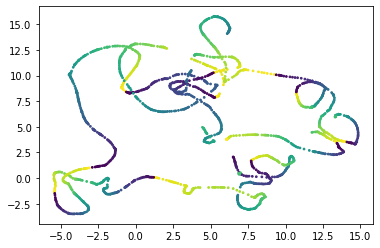

In [116]:
pos,_=ua.speedFilterFR(data['posx'][trial_idx],speed[trial_idx],speed_threshold=2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X_um[:,0],X_um[:,1],s=3,c=pos[::ds_factor])

In [108]:
counts,spMapN,stab=helpers.calculateFiringRateMap(data,good_cells=good_cells,trials2extract = trial_range,ops=opt)

C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\umap\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\umap\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [135]:
a = np.arange(200)
a.shape

(200,)

In [129]:
X = np.array([])
tri = np.array([])
gain = np.array([])
pos = np.array([])
for iT in range(counts.shape[2]):
    xs = spMapN[:,:,iT].T
    X = np.vstack([X, xs]) if X.size else xs
    tmp_tri = np.ones((200,1))*iT
    tri = np.vstack([tri,tmp_tri]) if tri.size else tmp_tri

    tmp_gain = np.ones((200,1))*iT
    gain = np.vstack([gain,tmp_gain]) if gain.size else tmp_gain

    tmp_pos = np.arange(200)
    pos = np.vstack([pos,tmp_pos]) if pos.size else tmp_pos

In [130]:
pca = PCA(n_components=3)
fr = X.mean(axis=0)
Xtmp = X[:,fr>0.1]
Xz=scipy.stats.zscore(Xtmp,axis=0)
Xz=Xtmp
Xt = pca.fit_transform(X)

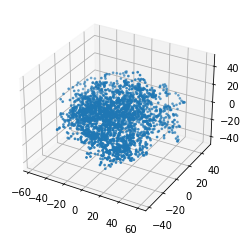

In [131]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection = '3d')
ax.scatter(Xt[:,0],Xt[:,1],Xt[:,2],s=3)


In [106]:
reducer = umap.UMAP(n_components=3)
fr = X.mean(axis=0)
Xtmp = X[:,fr>0.1]
Xz=scipy.stats.zscore(Xtmp,axis=0)
Xt = reducer.fit_transform(X)

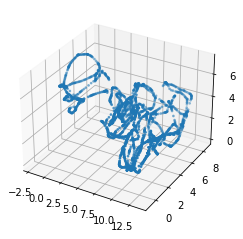

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection = '3d')
ax.scatter(Xt[:,0],Xt[:,1],Xt[:,2],s=3)

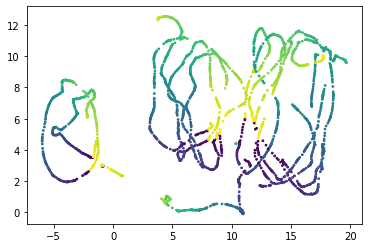

In [113]:
reducer = umap.UMAP(n_components=2,metric = 'cosine')
fr = X.mean(axis=0)
Xtmp = X[:,fr>0.1]
Xz=scipy.stats.zscore(Xtmp,axis=0)
Xt = reducer.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(Xt[:,0],Xt[:,1],s=3,c=pos)

In [117]:
spMapN.shape

(133, 200, 12)

In [119]:
tcPre.shape

(200, 133)

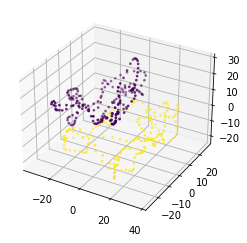

In [128]:
tc = spMapN.mean(axis=2).T
tcPre = spMapN[:,:,0:4].mean(axis = 2).T
tcPost = spMapN[:,:,4:8].mean(axis=2).T
fr = tc.mean(axis=0)
tcComb = np.vstack((tcPre,tcPost))
tcZ = scipy.stats.zscore(tcComb[:,fr>0.1],axis=0)
tcZ = tcComb[:,fr>0.1]
pca = PCA(n_components=3)

Xt = pca.fit_transform(tcZ)
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection = '3d')
tri = np.vstack((np.arange(200),np.arange(200)))
gain_v=0.5
gain = np.vstack((np.ones((200,)),np.ones((200,))*gain_v))
ax.scatter(Xt[:,0],Xt[:,1],Xt[:,2],s=3,c=gain)

In [127]:
            gain = gain = np.vstack((np.ones((200,)),np.ones((200,))*gain_v,np.ones((200,))))
